<a href="https://colab.research.google.com/github/NuoWenLei/AAPI-text-analysis-project/blob/main/notebooks/ML_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment Group Analysis

## Setup

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
main_path = "/content/gdrive/MyDrive/AAPI_text_analysis_project/"

## Part of Speech

### Load Data

In [ ]:
df = pd.read_csv(os.path.join(main_path, "full_df_7_5_2021.csv"))
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286,"[""racial"", ""tension"", ""simmer"", ""southern"", ""b...","[""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN""]","[""nashvil"", ""tenn."", ""race-rel"", ""tension"", ""w...","[""NN"", ""NN"", ""JJ"", ""NN"", ""IN"", ""JJ"", ""NN"", ""NN...","[{""uri"": ""dmoz/Society"", ""label"": ""dmoz/Societ...","[{""uri"": ""http://en.wikipedia.org/wiki/Black_c..."
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000,"[""asian"", ""american"", ""pacif"", ""island"", ""hate...","[""JJ"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""NN...","[""the"", ""u.s."", ""seen"", ""disturb"", ""surg"", ""ha...","[""DT"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN"", ""JJ...","[{""uri"": ""dmoz/Society/Issues"", ""label"": ""dmoz...","[{""uri"": ""http://en.wikipedia.org/wiki/United_..."
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410,"[""ap-norc"", ""poll"", ""more"", ""american"", ""belie...","[""JJ"", ""NN"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""NN""]","[""washington"", ""A"", ""major"", ""american"", ""acro...","[""NN"", ""DT"", ""NN"", ""NN"", ""IN"", ""JJ"", ""JJ"", ""NN...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit..

In [ ]:
limit_df = df[df['source_position'].isin(['Left',  'Right'])].copy()
limit_df['y_'] = np.where(limit_df['source_position'] == "Left", 1, 0)

In [ ]:
wider_df = df[df['source_position'] != 'Center'].copy()
wider_df['y_'] = np.where(wider_df['source_position'].isin(["Left", "Lean Left"]), 1, 0)
wider_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts,y_
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286,"[""racial"", ""tension"", ""simmer"", ""southern"", ""b...","[""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN""]","[""nashvil"", ""tenn."", ""race-rel"", ""tension"", ""w...","[""NN"", ""NN"", ""JJ"", ""NN"", ""IN"", ""JJ"", ""NN"", ""NN...","[{""uri"": ""dmoz/Society"", ""label"": ""dmoz/Societ...","[{""uri"": ""http://en.wikipedia.org/wiki/Black_c...",1
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000,"[""asian"", ""american"", ""pacif"", ""island"", ""hate...","[""JJ"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""NN...","[""the"", ""u.s."", ""seen"", ""disturb"", ""surg"", ""ha...","[""DT"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN"", ""JJ...","[{""uri"": ""dmoz/Society/Issues"", ""label"": ""dmoz...","[{""uri"": ""http://en.wikipedia.org/wiki/United_...",1
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410,"[""ap-norc"", ""poll"", ""more"", ""american"", ""belie...","[""JJ"", ""NN"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""NN""]","[""washington"", ""A"", ""major"", ""american"", ""acro...","[""NN"", ""DT"", ""NN"", ""NN"", ""IN"", ""JJ"", ""JJ"", ""NN...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http:/

### Data Preprocessing

In [ ]:
# Select all part of speech columns
pos_cols = [i for i in df.columns.values if i.endswith('per_word')]
pos_cols[:5]

['body_NNP_per_word',
 'body_,_per_word',
 'body_:_per_word',
 'body_JJ_per_word',
 'body_NNS_per_word']

In [ ]:
# Scale 
minmax = MinMaxScaler()
pos_X = minmax.fit_transform(wider_df[pos_cols])
pos_X.shape

(277, 83)

### ML Model Analysis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pos_X, wider_df['y_'], random_state=0, train_size=0.8)

In [ ]:
# Define and Train ML Models
clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        MultinomialNB()
]

clf_pred_data = []

for clf in clfs:
  print(str(clf))
  clf.fit(X_train, y_train)
  sc = clf.score(X_test, y_test)
  print(f"Score: {sc}")
  clf_pred_data.append([str(clf), sc, clf])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score: 0.6785714285714286
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Score: 0.6428571428571429
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, 

In [ ]:
clf_pred_df = pd.DataFrame(clf_pred_data, columns = ["clf_name", "score", "clf"])
clf_pred_df

,clf_name,score,clf
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.678571,"LogisticRegression(C=1.0, class_weight=None, d..."
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.642857,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
2,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.642857,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
3,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.678571,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.410714,"GaussianNB(priors=None, var_smoothing=1e-09)"
5,"MultinomialNB(alpha=1.0, class_prior=None, fit...",0.660714,"MultinomialNB(alpha=1.0, class_prior=None, fit..."


#### Gradient Boosting Features

In [ ]:
gradient_boost_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[3].feature_importances_), key = lambda x: x[1], reverse = True))

In [ ]:
gradient_boost_features[:10]

[('body_NN_per_word', 0.11358763414122904),
 ('body_)_per_word', 0.07020073875791459),
 ('body_NNPS_per_word', 0.06599550446797196),
 ('body_._per_word', 0.06169180588108166),
 ('body_(_per_word', 0.0614598675807045),
 ('body_VBG_per_word', 0.058251795223740424),
 ('body_NNP_per_word', 0.05528308065200819),
 ('title_NNP_per_word', 0.05447362097992952),
 ('body_WP$_per_word', 0.04251078116753591),
 ('body_VBZ_per_word', 0.04095709342445697)]

#### Logistic Regression Features

In [ ]:
clf_pred_df['clf'].iloc[0].coef_.shape

(1, 83)

In [ ]:
log_reg_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[0].coef_[0]), key = lambda x: x[1], reverse = True))

In [ ]:
log_reg_features[:5] # Most Indicative of Left Media

[('body_VB_per_word', 1.0771721117164228),
 ('body_NN_per_word', 0.9983560577963879),
 ('title_RB_per_word', 0.8254950444552932),
 ('title_VBD_per_word', 0.7497087934291109),
 ('body_RBR_per_word', 0.6318631382914993)]

In [ ]:
log_reg_features[-5:] # Most Indicative of Right Media

[('body_WRB_per_word', -0.6737956002229745),
 ('title_TO_per_word', -0.6768760567931136),
 ('body_NNP_per_word', -0.8924345722453336),
 ('body_NNPS_per_word', -0.9705572160033403),
 ('title_JJR_per_word', -0.9769917900842598)]

#### Multinomial Naive Bayes Features

In [ ]:
clf_pred_df['clf'].iloc[5]._get_coef().shape

(1, 83)

In [ ]:
mult_nb_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[5]._get_coef()[0]), key = lambda x: x[1], reverse = True))

In [ ]:
mult_nb_features[:5]

[('body_``_per_word', -3.195036116006733),
 ('body_,_per_word', -3.2456382670727395),
 ('body_._per_word', -3.2590968874395188),
 ('body_VBG_per_word', -3.2605039530355464),
 ("body_''_per_word", -3.2804713106102996)]

In [ ]:
mult_nb_features[-5:]

[('title_PDT_per_word', -6.965495475484977),
 ('title_$_per_word', -6.965495475484977),
 ('title_TO_per_word', -7.145320152080345),
 ('title_UH_per_word', -7.658642656044923),
 ('title_RBS_per_word', -7.658642656044923)]

### Dimension Reduction Analysis

#### PCA Analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
decomposed_X = pca.fit_transform(wider_df[pos_cols])

In [ ]:
print(pca.explained_variance_ratio_)

[0.45375008 0.1326666 ]


In [ ]:
decomposed_X.shape

(277, 2)

In [ ]:
wider_df[pos_cols].shape

(277, 83)

In [ ]:
minmax = MinMaxScaler()
decomp_minmax_X = pd.DataFrame(minmax.fit_transform(decomposed_X), columns = ["0", "1"])
decomp_minmax_X['y_'] = wider_df['y_']

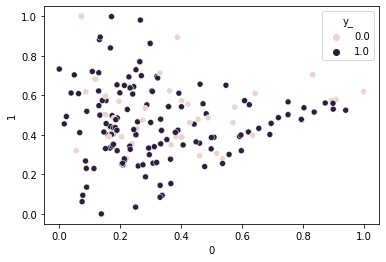

In [ ]:
sns.scatterplot(data = decomp_minmax_X, x = "0", y = "1", hue = "y_")

#### TSNE Analysis

In [ ]:
from sklearn.manifold import TSNE
import time

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=15, n_iter=300)
tsne_processed_X = tsne.fit_transform(wider_df[pos_cols])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 277 samples in 0.002s...
[t-SNE] Computed neighbors for 277 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 277 / 277
[t-SNE] Mean sigma: 0.107058
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.738831
[t-SNE] KL divergence after 300 iterations: 0.949706
t-SNE done! Time elapsed: 0.49987077713012695 seconds


In [ ]:
minmax = MinMaxScaler()
minmaxed_X = pd.DataFrame(minmax.fit_transform(tsne_processed_X), columns = ["0", "1"])
minmaxed_X['y_'] = wider_df['y_']

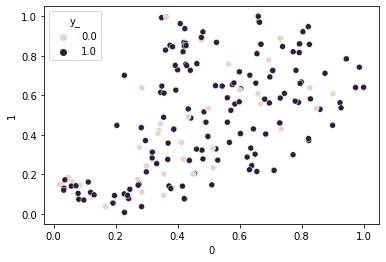

In [ ]:
sns.scatterplot(data = minmaxed_X, x = "0", y = "1", hue = "y_")

## T testing

### Load Data

In [ ]:
from scipy import stats
from itertools import combinations

In [ ]:
position_list = ["0_per_article_left", "1_per_article_lean_left", "2_per_article_center", "3_per_article_lean_right", "4_per_article_right"]

In [ ]:
title_df = pd.read_csv(os.path.join(main_path, "title_stem_dataframe.csv"))
title_df.head()

,Lean Left,Left,Center,Lean Right,Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,11,0,15,0,4,racial,JJ,30,0.000000,0.063584,0.105263,0.0,0.066372,0.000000,0.063584,0.105263,0.0,0.066372
1,3,1,1,0,0,tension,NN,5,0.027027,0.017341,0.000000,0.0,0.004425,0.027027,0.017341,0.000000,0.0,0.004425
2,2,1,1,0,0,simmer,VB,4,0.027027,0.011561,0.000000,0.0,0.004425,0.027027,0.011561,0.000000,0.0,0.004425
3,3,1,1,0,0,southern,JJ,5,0.027027,0.017341,0.000000,0.0,0.004425,0.027027,0.017341,0.000000,0.0,0.004425
4,4,1,2,0,0,baptist,NN,7,0.027027,0.023121,0.000000,0.0,0.008850,0.027027,0.023121,0.000000,0.0,0.008850


In [ ]:
body_df = pd.read_csv(os.path.join(main_path, "body_stem_dataframe.csv"))
body_df.head()

,Lean Left,Left,Center,Lean Right,Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,10,3,4,0,0,nashvil,NN,17,0.081081,0.057803,0.000000,0.000000,0.017699,0.081081,0.057803,0.000000,0.000000,0.017699
1,4,0,1,0,0,tenn.,NN,5,0.000000,0.023121,0.000000,0.000000,0.004425,0.000000,0.023121,0.000000,0.000000,0.004425
2,7,2,3,0,1,race-rel,JJ,13,0.054054,0.040462,0.026316,0.000000,0.013274,0.054054,0.040462,0.026316,0.000000,0.013274
3,24,3,20,2,2,tension,NN,51,0.081081,0.138728,0.052632,0.068966,0.088496,0.081081,0.138728,0.052632,0.068966,0.088496
4,34,6,43,4,10,within,IN,97,0.162162,0.196532,0.263158,0.137931,0.190265,0.162162,0.196532,0.263158,0.137931,0.190265


In [ ]:
concept_df = pd.read_csv(os.path.join(main_path, "concept_dataframe.csv"))
concept_df.head()

,Left,Lean Left,Center,Lean Right,Right,concept_data,concept_label,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,concept_type
0,1,4,1,0,0,"{""label"": ""Black church"", ""score"": 5, ""type"": ...",Black church,6,0.027027,0.023121,0.000000,0.000000,0.004425,0.027027,0.023121,0.000000,0.000000,0.004425,person
1,1,3,1,0,0,"{""label"": ""The Reverend"", ""score"": 5, ""type"": ...",The Reverend,5,0.027027,0.017341,0.000000,0.000000,0.004425,0.027027,0.017341,0.000000,0.000000,0.004425,person
2,1,3,2,0,0,"{""label"": ""Christian denomination"", ""score"": 5...",Christian denomination,6,0.027027,0.017341,0.000000,0.000000,0.008850,0.027027,0.017341,0.000000,0.000000,0.008850,wiki
3,1,3,2,0,0,"{""label"": ""Southern Baptist Convention"", ""scor...",Southern Baptist Convention,6,0.027027,0.017341,0.000000,0.000000,0.008850,0.027027,0.017341,0.000000,0.000000,0.008850,org
4,0,5,1,1,1,"{""label"": ""Critical race theory"", ""score"": 5, ...",Critical race theory,8,0.000000,0.028902,0.026316,0.034483,0.004425,0.000000,0.028902,0.026316,0.034483,0.004425,wiki


In [ ]:
category_df = pd.read_csv(os.path.join(main_path, "category_dataframe.csv"))

In [ ]:
category_df.head()

,Left,Lean Left,Center,Lean Right,Right,category,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,1,5,2,0,0,dmoz/Society,8,0.027027,0.028902,0.000000,0.000000,0.008850,0.027027,0.028902,0.000000,0.000000,0.008850
1,22,116,147,21,23,news/Politics,329,0.594595,0.670520,0.605263,0.724138,0.650442,0.594595,0.670520,0.605263,0.724138,0.650442
2,1,4,2,0,0,dmoz/Society/Religion_and_Spirituality,7,0.027027,0.023121,0.000000,0.000000,0.008850,0.027027,0.023121,0.000000,0.000000,0.008850
3,37,173,226,29,38,dmoz/Society/Issues/Race-Ethnic-Religious_Rela...,503,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1,4,2,0,0,dmoz/Society/Religion_and_Spirituality/Christi...,7,0.027027,0.023121,0.000000,0.000000,0.008850,0.027027,0.023121,0.000000,0.000000,0.008850


### Word Choice and Part of Speech

In [ ]:
# T-Test each Part of Speech by 2-sample testing left and right per_article

#### Title Test

In [ ]:
pos_dict_title = {}
for pos in title_df["pos"].unique():
  pos_dict_title[pos] = title_df[title_df["pos"] == pos]

In [ ]:
pos_dict_title.keys()

dict_keys(['JJ', 'NN', 'VB', 'MD', 'IN', 'DT', 'CD', 'WR', 'RB', 'PR', 'RP', 'PD', 'TO', 'FW', 'WP', 'UH'])

In [ ]:
for pair in combinations(position_list, 2):
  print(f"Overall T-test for Variables: {pair}")
  print(stats.ttest_ind(title_df[pair[0]], title_df[pair[1]]))
  print()
  print("Specific T-test per POS")
  for k in pos_dict_title.keys():
    try:
      print(k)
      print(stats.ttest_ind(pos_dict_title[k][pair[0]], pos_dict_title[k][pair[1]]))
    except:
      pass
  print()
  print()

Overall T-test for Variables: ('0_per_article_left', '1_per_article_lean_left')
Ttest_indResult(statistic=-0.06827058055455752, pvalue=0.9455759015476233)

Specific T-test per POS
JJ
Ttest_indResult(statistic=-1.010322576557726, pvalue=0.3132130379041699)
NN
Ttest_indResult(statistic=0.289006347024447, pvalue=0.7726173821206147)
VB
Ttest_indResult(statistic=-0.26289058614538946, pvalue=0.7927486602440571)
MD
Ttest_indResult(statistic=-2.713602101199872, pvalue=0.026509885484624286)
IN
Ttest_indResult(statistic=0.6279068260972062, pvalue=0.5340281684389822)
DT
Ttest_indResult(statistic=1.4420059831698175, pvalue=0.17488720532618)
CD
Ttest_indResult(statistic=0.7020723057296794, pvalue=0.4865068214628203)
WR
Ttest_indResult(statistic=0.10980872167831707, pvalue=0.9225865196629492)
RB
Ttest_indResult(statistic=-2.32794489958032, pvalue=0.02457616593069109)
PR
Ttest_indResult(statistic=0.7994429198606129, pvalue=0.43738793372509777)
RP
Ttest_indResult(statistic=nan, pvalue=nan)
PD
Ttest_in

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### Body Test

In [ ]:
pos_dict_body = {}
for pos in body_df["pos"].unique():
  pos_dict_body[pos] = body_df[body_df["pos"] == pos]


In [ ]:
pos_dict_body.keys()

dict_keys(['NN', 'JJ', 'IN', 'VB', 'DT', 'MD', 'PR', 'CD', 'RB', 'EX', 'WP', 'CC', 'WR', 'UH', 'RP', 'WD', 'TO', 'PD', 'FW', '$'])

In [ ]:
stats.ttest_ind(body_df["0_per_article_left"], body_df["4_per_article_right"]) # WOW, DID NOT EXPECT THAT
# Reject Null Hypothesis for Word Choice Effect Between Left and Right Media Articles!!!

Ttest_indResult(statistic=-2.037530872334374, pvalue=0.041606505612996406)

In [ ]:
body_df.shape # Large Sample of over 13000 words compared

(13634, 18)

In [ ]:
for pair in combinations(position_list, 2):
  print(f"Overall T-test for Variables: {pair}")
  print(stats.ttest_ind(body_df[pair[0]], body_df[pair[1]]))
  print()
  print("Specific T-test per POS")
  for k in pos_dict_body.keys():
    print(k)
    print(stats.ttest_ind(pos_dict_body[k][pair[0]], pos_dict_body[k][pair[1]]))
  print()
  print()

Overall T-test for Variables: ('0_per_article_left', '1_per_article_lean_left')
Ttest_indResult(statistic=-1.3994640959009577, pvalue=0.16168523421229444)

Specific T-test per POS
NN
Ttest_indResult(statistic=-0.642864211102849, pvalue=0.5203223577904155)
JJ
Ttest_indResult(statistic=-0.34171645721754446, pvalue=0.7325774558416296)
IN
Ttest_indResult(statistic=-0.5405639317255972, pvalue=0.5894480320490916)
VB
Ttest_indResult(statistic=-1.1504447587270399, pvalue=0.2500185740636475)
DT
Ttest_indResult(statistic=-0.04840957697051736, pvalue=0.9616433722264511)
MD
Ttest_indResult(statistic=0.04360550847715614, pvalue=0.9655520300639063)
PR
Ttest_indResult(statistic=-0.43230164329848214, pvalue=0.6679656137832597)
CD
Ttest_indResult(statistic=-0.20535964044764943, pvalue=0.8373365789924865)
RB
Ttest_indResult(statistic=-0.6746834183808997, pvalue=0.5000127671792554)
EX
Ttest_indResult(statistic=nan, pvalue=nan)
WP
Ttest_indResult(statistic=-0.6100226904704538, pvalue=0.5587720628258435)
C

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


FW
Ttest_indResult(statistic=2.6874192494328497, pvalue=0.012389062561097045)
$
Ttest_indResult(statistic=1.0, pvalue=0.42264973081037427)


Overall T-test for Variables: ('1_per_article_lean_left', '4_per_article_right')
Ttest_indResult(statistic=-0.5684660750745008, pvalue=0.5697232167630117)

Specific T-test per POS
NN
Ttest_indResult(statistic=-0.3040956494446955, pvalue=0.7610593758627344)
JJ
Ttest_indResult(statistic=-0.44817006912075397, pvalue=0.6540482707540278)
IN
Ttest_indResult(statistic=-0.18058841573468506, pvalue=0.8568851719513099)
VB
Ttest_indResult(statistic=0.021883303800267175, pvalue=0.982541961226118)
DT
Ttest_indResult(statistic=-0.0045461960935264745, pvalue=0.9963964560805467)
MD
Ttest_indResult(statistic=0.09514858128037532, pvalue=0.9249263562416836)
PR
Ttest_indResult(statistic=-0.15368767014184942, pvalue=0.8786692953451709)
CD
Ttest_indResult(statistic=0.09450873951493888, pvalue=0.9247256195250906)
RB
Ttest_indResult(statistic=-0.6743176365629363, pvalue=

### Concept and Category

#### Category T-testing

In [ ]:
for pair in combinations(position_list, 2):
  print(pair)
  print()
  print(stats.ttest_ind(category_df[pair[0]], category_df[pair[1]]))
  print()


('0_per_article_left', '1_per_article_lean_left')

Ttest_indResult(statistic=0.1824979253684941, pvalue=0.8553212748265911)

('0_per_article_left', '2_per_article_center')

Ttest_indResult(statistic=0.2179097475582852, pvalue=0.8276548246272344)

('0_per_article_left', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.0024567960217716507, pvalue=0.9980414751062926)

('0_per_article_left', '4_per_article_right')

Ttest_indResult(statistic=0.4258863739791736, pvalue=0.6705109684768312)

('1_per_article_lean_left', '2_per_article_center')

Ttest_indResult(statistic=0.03473014314815723, pvalue=0.972319151203054)

('1_per_article_lean_left', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.1721707813038536, pvalue=0.8634250346840642)

('1_per_article_lean_left', '4_per_article_right')

Ttest_indResult(statistic=0.23289375428127693, pvalue=0.8160104930635901)

('2_per_article_center', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.20516940034994705, pvalue=0.83758

#### Concept T-testing

In [ ]:
# General T-test
for pair in combinations(position_list, 2):
  print(pair)
  print()
  print(stats.ttest_ind(concept_df[pair[0]], concept_df[pair[1]]))
  print()

('0_per_article_left', '1_per_article_lean_left')

Ttest_indResult(statistic=0.34462626380260847, pvalue=0.730388764151751)

('0_per_article_left', '2_per_article_center')

Ttest_indResult(statistic=0.38355256383049363, pvalue=0.7013251868844796)

('0_per_article_left', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.003752250855254138, pvalue=0.9970062824483188)

('0_per_article_left', '4_per_article_right')

Ttest_indResult(statistic=0.758106510942182, pvalue=0.448420268527002)

('1_per_article_lean_left', '2_per_article_center')

Ttest_indResult(statistic=0.057828783737529955, pvalue=0.953887147712695)

('1_per_article_lean_left', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.2544238099650504, pvalue=0.7991778352061816)

('1_per_article_lean_left', '4_per_article_right')

Ttest_indResult(statistic=0.3907238399039532, pvalue=0.6960167714627783)

('2_per_article_center', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.29192492157743927, pvalue=0.7703552

In [ ]:
# Type-specific
type_dict = {}
for t in concept_df["concept_type"].unique():
  type_dict[t] = concept_df[concept_df["concept_type"] == t]

In [ ]:
for pair in combinations(position_list, 2):
  print(pair)
  for k in type_dict.keys():
    print(k)
    res = stats.ttest_ind(type_dict[k][pair[0]], type_dict[k][pair[1]])
    print(res)
  print()
  print()

('0_per_article_left', '1_per_article_lean_left')
person
Ttest_indResult(statistic=-0.520959854651316, pvalue=0.6025136401089304)
wiki
Ttest_indResult(statistic=0.12817739082484456, pvalue=0.8980185741126037)
org
Ttest_indResult(statistic=1.2783630231453518, pvalue=0.20154758892257674)
loc
Ttest_indResult(statistic=0.14720435621561873, pvalue=0.8829964798852615)


('0_per_article_left', '2_per_article_center')
person
Ttest_indResult(statistic=-0.6584666738754443, pvalue=0.5103945590212097)
wiki
Ttest_indResult(statistic=0.14132724858856707, pvalue=0.8876224494254314)
org
Ttest_indResult(statistic=1.634283034557768, pvalue=0.10265163262662387)
loc
Ttest_indResult(statistic=0.22370142265694762, pvalue=0.8230293020722171)


('0_per_article_left', '3_per_article_lean_right')
person
Ttest_indResult(statistic=-1.5605061723661942, pvalue=0.11896649303500184)
wiki
Ttest_indResult(statistic=0.12756498471254163, pvalue=0.8985031765275064)
org
Ttest_indResult(statistic=3.3407117844318743, pvalue=

## Top Picks

### ML Model POS Analysis and Weightage

#### Logistic Regression (Accuracy of 0.679)

In [ ]:
log_reg_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[0].coef_[0]), key = lambda x: x[1], reverse = True))

In [ ]:
log_reg_features[:5] # Most Indicative of Left Media

[('body_VB_per_word', 1.0771721117164228),
 ('body_NN_per_word', 0.9983560577963879),
 ('title_RB_per_word', 0.8254950444552932),
 ('title_VBD_per_word', 0.7497087934291109),
 ('body_RBR_per_word', 0.6318631382914993)]

In [ ]:
log_reg_features[-5:] # Most Indicative of Right Media

[('body_WRB_per_word', -0.6737956002229745),
 ('title_TO_per_word', -0.6768760567931136),
 ('body_NNP_per_word', -0.8924345722453336),
 ('body_NNPS_per_word', -0.9705572160033403),
 ('title_JJR_per_word', -0.9769917900842598)]

#### Gradient Boosting Classifier (Accuracy of 0.679)

In [ ]:
gradient_boost_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[3].feature_importances_), key = lambda x: x[1], reverse = True))

In [ ]:
gradient_boost_features[:10] # 10 Most Considered Features

[('body_NN_per_word', 0.11190897961975291),
 ('body_)_per_word', 0.08302422067493218),
 ('body_NNPS_per_word', 0.06744038711897547),
 ('body_._per_word', 0.06153040341337466),
 ('body_VBG_per_word', 0.056403508964272396),
 ('body_NNP_per_word', 0.055575667756143955),
 ('title_NNP_per_word', 0.054822291740529584),
 ('body_(_per_word', 0.049050311403254096),
 ('body_WP$_per_word', 0.0456683609483241),
 ('body_VBZ_per_word', 0.04489864918724398)]

### T-testing

#### Concept Analysis

In [ ]:
stats.ttest_ind(type_dict["org"]["1_per_article_lean_left"], type_dict["org"]["3_per_article_lean_right"])
# Organization Concept Appearance Frequency Difference Between Lean Left and Lean Right Rejects Null Hypothesis

Ttest_indResult(statistic=2.661611993602285, pvalue=0.007956181782695835)

In [ ]:
type_dict["org"].shape

(349, 19)

#### Word Choice Analysis

In [ ]:
stats.ttest_ind(body_df["0_per_article_left"], body_df["4_per_article_right"])
# Reject Null Hypothesis for Word Choice Frequency Between Left and Right Media Articles

Ttest_indResult(statistic=-2.037530872334374, pvalue=0.041606505612996406)

In [ ]:
stats.ttest_ind(body_df["1_per_article_lean_left"], body_df["3_per_article_lean_right"])
# Also Reject Null Hypothesis for Word Choice Frequency Between Lean Left and Lean Right Media Articles

Ttest_indResult(statistic=-2.650916855085785, pvalue=0.00803199777917408)

In [ ]:
body_df.shape # Ample sample size of over 13,000

(13634, 18)

# Control Group Analysis

## Setup

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

In [3]:
main_path = "/content/gdrive/MyDrive/AAPI_text_analysis_project/control_group_data"

## Part of Speech

### Load Data

In [4]:
df = pd.read_csv(os.path.join(main_path, "section_6_full_df.csv"))
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0,"[""U.S."", ""warns"", ""that"", ""extremists"", ""may"",...","[""WASHINGTON"", ""--"", ""A"", ""national"", ""terrori...",1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,-0.9964,0.1531,0.173,0.234,0.724,0.565,0.103,0.202,0,4,0.0,0.005348,"[""u.s."", ""warn"", ""extremist"", ""may"", ""strike"",...","[""NN"", ""VB"", ""NN"", ""MD"", ""VB"", ""NN"", ""NN"", ""VB""]","[""washington"", ""A"", ""nation"", ""terror"", ""alert...","[""NN"", ""DT"", ""JJ"", ""NN"", ""JJ"", ""VB"", ""NN"", ""VB...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http://en.wikipedia.org/wiki/Violent..."
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0,"[""Jesuits"", ""pledge"", ""$"", ""100"", ""million"", ""...","[""WASHINGTON"", ""--"", ""One"", ""of"", ""the"", ""Cath...",4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,center,-0.7845,-0.4019,0.087,0.153,0.821,0.847,0.092,0.000,0,53,0.0,0.049074,"[""jesuit"", ""pledg"", ""100"", ""million"", ""descend...","[""NN"", ""VB"", ""CD"", ""CD"", ""NN"", ""NN"", ""NN"", ""NN...","[""washington"", ""one"", ""cathol"", ""church"", ""wel...","[""NN"", ""CD"", ""NN"", ""NN"", ""JJ"", ""JJ"", ""NN"", ""VB...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http://en.wikipedia.org/wiki/Salvati..."
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0,"[""NFL"", ""teams"", ""huddling"", ""up"", ""to"", ""devi...","[""Florham"", ""Park"", "","", ""New"", ""Jersey"", ""-"",...",1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,0.9266,0.0000,0.057,0.000,0.863,1.000,0.080,0.000,0,113,0.0,0.095038,"[""nfl"", ""team"", ""huddl"", ""devis"", ""plan"", ""soc...","[""NN"", ""NN"", ""VB""

In [5]:
limit_df = df[df['source_position'].isin(['Left',  'Right'])].copy()
limit_df['y_'] = np.where(limit_df['source_position'] == "Left", 1, 0)

In [6]:
wider_df = df[df['source_position'] != 'Center'].copy()
wider_df['y_'] = np.where(wider_df['source_position'].isin(["Left", "Lean Left"]), 1, 0)
wider_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts,y_
500,0.011765,6,6498699517,Who Are the Jurors in the Derek Chauvin Trial?,MINNEAPOLIS -- A white intensive care nurse wh...,nytimes.com,The New York Times,30,90,7746,True,2021-03-30,"{""uri"": ""6498699517"", ""lang"": ""eng"", ""isDuplic...",10,1686,325384,/news-source/new-york-times,Lean Left,1,"[""Who"", ""Are"", ""the"", ""Jurors"", ""in"", ""the"", ""...","[""MINNEAPOLIS"", ""--"", ""A"", ""white"", ""intensive...",3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9992,0.0000,0.130,0.00,0.819,1.00,0.051,0.0,0,160,0.000000,0.094899,"[""who"", ""are"", ""juror"", ""derek"", ""chauvin"", ""t...","[""WP"", ""VB"", ""NN"", ""NN"", ""NN"", ""NN""]","[""minneapoli"", ""A"", ""white"", ""intens"", ""care"",...","[""NN"", ""NN"", ""JJ"", ""JJ"", ""NN"", ""NN"", ""VB"", ""VB...","[{""uri"": ""news/Arts_and_Entertainment"", ""label...","[{""uri"": ""http://en.wikipedia.org/wiki/Jury"", ...",1
501,-0.184314,5,6551179774,Keisha Lance Bottoms Won't Seek Second Term as...,"ATLANTA -- Keisha Lance Bottoms, the first-ter...",nytimes.com,The New York Times,30,90,7746,True,2021-05-07,"{""uri"": ""6551179774"", ""lang"": ""eng"", ""isDuplic...",11,523,325384,/news-source/new-york-times,Lean Left,1,"[""Keisha"", ""Lance"", ""Bottoms"", ""Wo"", ""n't"", ""S...","[""ATLANTA"", ""--"", ""Keisha"", ""Lance"", ""Bottoms""...",8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0.0,0.0,0.000000,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9746,0.0000,0.129,0.00,0.781,1.00,0.089,0.0,6,42,0.545455,0.080306,"[""keisha"", ""lanc"", ""bottom"", ""Wo"", ""n't"", ""see...","[""NN"", ""NN"", ""NN"", ""NN"", ""RB"", ""NN"", ""JJ"", ""NN...","[""atlanta"", ""keisha"", ""lanc"", ""bottom"", ""first...","[""NN"", ""NN"", ""NN"", ""NN"", ""JJ"", ""NN"", ""NN"", ""VB...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http://en.wikipedia.org/wiki/Keisha_...",1
502,-0.066667,5,6169235469,White House-USAID liaison fired after series o...,WASHINGTON -- Deputy White House Liaison to th...,nbcnews.com,NBC News,221,759,154140,True,2020-08-03,"{""uri"": ""6169235469"", ""lang"": ""eng"", ""isDuplic...",9,298,113020,/news-source/nbc-news-media-bias,Lean Left,1,"[""White"", ""House-USAID"", ""liaison"", ""fired"", ""...","[""WASHINGTON"", ""--"", ""Deputy"", ""White"", ""House...",2,0,1,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.2732,-0.5574,0.110,0.31,0.799,0.69,0.091,0.0,0,52,0.000000,0.174497,"[""white"", ""house-usaid"", ""liaison"", ""fire"", ""s...","[""NN"", ""NN"", ""NN"", ""VB"", ""NN"", ""JJ"", ""NN""]","[""washington"", ""deputi"", ""white"", ""hous"", ""lia...","[""NN"", ""

### Data Preprocessing

In [7]:
# Select all part of speech columns
pos_cols = [i for i in df.columns.values if i.endswith('per_word')]
pos_cols[:5]

['body_NNP_per_word',
 'body_,_per_word',
 'body_:_per_word',
 'body_JJ_per_word',
 'body_NNS_per_word']

In [8]:
# Scale 
minmax = MinMaxScaler()
pos_X = minmax.fit_transform(wider_df[pos_cols])
pos_X.shape

(612, 83)

### ML Model Analysis

In [9]:
X_train, X_test, y_train, y_test = train_test_split(pos_X, wider_df['y_'], random_state=0, train_size=0.8)

In [10]:
# Define and Train ML Models
clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        MultinomialNB()
]

clf_pred_data = []

for clf in clfs:
  print(str(clf))
  clf.fit(X_train, y_train)
  sc = clf.score(X_test, y_test)
  print(f"Score: {sc}")
  clf_pred_data.append([str(clf), sc, clf])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score: 0.7479674796747967
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Score: 0.6422764227642277
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, 

In [11]:
clf_pred_df = pd.DataFrame(clf_pred_data, columns = ["clf_name", "score", "clf"])
clf_pred_df

,clf_name,score,clf
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.747967,"LogisticRegression(C=1.0, class_weight=None, d..."
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.642276,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
2,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.756098,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
3,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.723577,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.382114,"GaussianNB(priors=None, var_smoothing=1e-09)"
5,"MultinomialNB(alpha=1.0, class_prior=None, fit...",0.715447,"MultinomialNB(alpha=1.0, class_prior=None, fit..."


#### Gradient Boosting Features

In [12]:
gradient_boost_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[3].feature_importances_), key = lambda x: x[1], reverse = True))

In [13]:
gradient_boost_features[:10]

[("body_''_per_word", 0.09375567313854265),
 ('body_VBZ_per_word', 0.05413732589512485),
 ('body_:_per_word', 0.04894621648049664),
 ('body_NNP_per_word', 0.04872399065623992),
 ('body_NN_per_word', 0.04186178533396248),
 ('body_)_per_word', 0.04113428999120324),
 ('body_NNS_per_word', 0.03942757324032609),
 ('body_(_per_word', 0.03887790355969938),
 ('body_PRP_per_word', 0.036592493360624805),
 ('body_VBN_per_word', 0.03506124665174997)]

#### Random Forest Features

In [71]:
random_forest_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[2].feature_importances_), key = lambda x: x[1], reverse = True))

In [72]:
random_forest_features[:10]

[("body_''_per_word", 0.05099454552407479),
 ('body_NNP_per_word', 0.039212959796272054),
 ('body_NNS_per_word', 0.03653873220208446),
 ('body_)_per_word', 0.033938690217596615),
 ('body_:_per_word', 0.027509688684404895),
 ('body_VBZ_per_word', 0.027094574450475407),
 ('body_NN_per_word', 0.02659751213350846),
 ('body_negation_per_word', 0.026475958774348),
 ('body_VB_per_word', 0.02641401789161207),
 ('body_VBN_per_word', 0.025760791139495795)]

#### Logistic Regression Features

In [14]:
clf_pred_df['clf'].iloc[0].coef_.shape

(1, 83)

In [15]:
log_reg_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[0].coef_[0]), key = lambda x: x[1], reverse = True))

In [16]:
log_reg_features[:5] # Most Indicative of Left Media

[('body_VBN_per_word', 1.1674468522354657),
 ('body_NNS_per_word', 0.8781102790301596),
 ('body_VB_per_word', 0.801485109578832),
 ('body_MD_per_word', 0.797643887216918),
 ('body_CD_per_word', 0.6829500255430481)]

In [17]:
log_reg_features[-5:] # Most Indicative of Right Media

[('body_UH_per_word', -0.8301971506749934),
 ('body_NNPS_per_word', -0.907292209794988),
 ('body_WRB_per_word', -1.2720236422648346),
 ('body_NNP_per_word', -1.4823595072181228),
 ("body_''_per_word", -1.7481230006308661)]

#### Multinomial Naive Bayes Features

In [18]:
clf_pred_df['clf'].iloc[5]._get_coef().shape

(1, 83)

In [19]:
mult_nb_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[5]._get_coef()[0]), key = lambda x: x[1], reverse = True))

In [20]:
mult_nb_features[:5]

[('body_,_per_word', -3.0265866339879217),
 ('body_VBD_per_word', -3.1015232134951667),
 ('body_NN_per_word', -3.1475804096362223),
 ('body_JJ_per_word', -3.2040476359128522),
 ('body_VBG_per_word', -3.219074482066837)]

In [21]:
mult_nb_features[-5:]

[('title_$_per_word', -7.58252326639459),
 ('body_RBS_per_word', -7.643368638298299),
 ('title_JJR_per_word', -8.249002199872374),
 ('title_PDT_per_word', -8.249002199872374),
 ('title_RBS_per_word', -8.249002199872374)]

### Dimension Reduction Analysis

#### PCA Analysis

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

In [24]:
decomposed_X = pca.fit_transform(wider_df[pos_cols])

In [25]:
print(pca.explained_variance_ratio_)

[0.48497889 0.09092439]


In [26]:
decomposed_X.shape

(612, 2)

In [27]:
wider_df[pos_cols].shape

(612, 83)

In [32]:
minmax = MinMaxScaler()
decomp_minmax_X = pd.DataFrame(minmax.fit_transform(decomposed_X), columns = ["0", "1"])
decomp_minmax_X['y_'] = wider_df['y_'].values
decomp_minmax_X[:5]

,0,1,y_
0,0.400670,0.277031,1
1,0.764294,0.385730,1
2,0.249673,0.530424,1
3,0.168547,0.406411,1
4,0.261130,0.477488,1


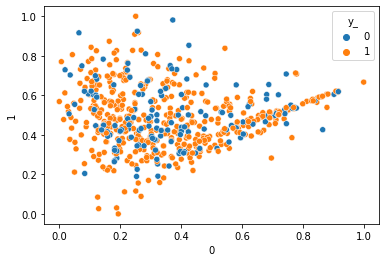

In [33]:
sns.scatterplot(data = decomp_minmax_X, x = "0", y = "1", hue = "y_")

#### TSNE Analysis

In [34]:
from sklearn.manifold import TSNE
import time

In [35]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=15, n_iter=300)
tsne_processed_X = tsne.fit_transform(wider_df[pos_cols])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 612 samples in 0.009s...
[t-SNE] Computed neighbors for 612 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 612 / 612
[t-SNE] Mean sigma: 0.085352
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.614021
[t-SNE] KL divergence after 300 iterations: 1.471244
t-SNE done! Time elapsed: 1.3319246768951416 seconds


In [37]:
minmax = MinMaxScaler()
minmaxed_X = pd.DataFrame(minmax.fit_transform(tsne_processed_X), columns = ["0", "1"])
minmaxed_X['y_'] = wider_df['y_'].values

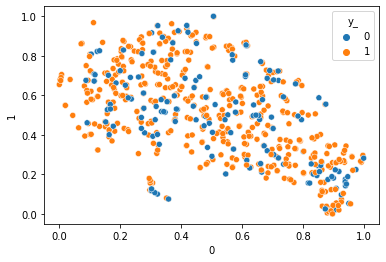

In [38]:
sns.scatterplot(data = minmaxed_X, x = "0", y = "1", hue = "y_")

## T testing

### Load Data

In [39]:
from scipy import stats
from itertools import combinations

In [40]:
position_list = ["0_per_article_left", "1_per_article_lean_left", "2_per_article_center", "3_per_article_lean_right", "4_per_article_right"]

In [41]:
title_df = pd.read_csv(os.path.join(main_path, "title_stem_dataframe.csv"))
title_df.head()

,Center,Lean Left,Right,Left,Lean Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,17,3,0,1,1,u.s.,NN,22,0.012346,0.007833,0.000000,0.015625,0.034,0.012346,0.007833,0.000000,0.015625,0.034
1,4,0,2,0,1,warn,VB,7,0.000000,0.000000,0.023810,0.015625,0.008,0.000000,0.000000,0.023810,0.015625,0.008
2,3,1,1,1,1,extremist,NN,7,0.012346,0.002611,0.011905,0.015625,0.006,0.012346,0.002611,0.011905,0.015625,0.006
3,4,2,1,0,0,may,MD,7,0.000000,0.005222,0.011905,0.000000,0.008,0.000000,0.005222,0.011905,0.000000,0.008
4,1,0,1,0,0,strike,VB,2,0.000000,0.000000,0.011905,0.000000,0.002,0.000000,0.000000,0.011905,0.000000,0.002


In [42]:
body_df = pd.read_csv(os.path.join(main_path, "body_stem_dataframe.csv"))
body_df.head()

,Center,Lean Left,Right,Left,Lean Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,395,295,52,94,48,washington,NN,884,1.160494,0.770235,0.619048,0.75000,0.790,1.160494,0.770235,0.619048,0.75000,0.790
1,382,335,48,40,18,A,DT,823,0.493827,0.874674,0.571429,0.28125,0.764,0.493827,0.874674,0.571429,0.28125,0.764
2,245,191,45,23,24,nation,JJ,528,0.283951,0.498695,0.535714,0.37500,0.490,0.283951,0.498695,0.535714,0.37500,0.490
3,63,57,13,12,4,terror,NN,149,0.148148,0.148825,0.154762,0.06250,0.126,0.148148,0.148825,0.154762,0.06250,0.126
4,1,6,1,0,0,alert,JJ,8,0.000000,0.015666,0.011905,0.00000,0.002,0.000000,0.015666,0.011905,0.00000,0.002


In [43]:
concept_df = pd.read_csv(os.path.join(main_path, "concept_dataframe.csv"))
concept_df.head()

,Left,Lean Left,Center,Lean Right,Right,concept_data,concept_label,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,concept_type
0,0,3,3,0,1,"{""label"": ""Violent extremism"", ""score"": 5, ""ty...",Violent extremism,7,0.000000,0.007833,0.011905,0.000000,0.006,0.000000,0.007833,0.011905,0.000000,0.006,wiki
1,0,0,3,0,1,"{""label"": ""United States Department of Homelan...",United States Department of Homeland Security,4,0.000000,0.000000,0.011905,0.000000,0.006,0.000000,0.000000,0.011905,0.000000,0.006,org
2,1,2,5,0,2,"{""label"": ""Conspiracy theory"", ""score"": 4, ""ty...",Conspiracy theory,10,0.012346,0.005222,0.023810,0.000000,0.010,0.012346,0.005222,0.023810,0.000000,0.010,wiki
3,0,0,4,1,0,"{""label"": ""Email"", ""score"": 4, ""type"": ""wiki"",...",Email,5,0.000000,0.000000,0.000000,0.015625,0.008,0.000000,0.000000,0.000000,0.015625,0.008,wiki
4,0,1,2,0,1,"{""label"": ""Terrorism"", ""score"": 4, ""type"": ""wi...",Terrorism,4,0.000000,0.002611,0.011905,0.000000,0.004,0.000000,0.002611,0.011905,0.000000,0.004,wiki


In [44]:
category_df = pd.read_csv(os.path.join(main_path, "category_dataframe.csv"))

In [45]:
category_df.head()

,Left,Lean Left,Center,Lean Right,Right,category,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,55,263,365,48,63,news/Politics,794,0.679012,0.686684,0.750000,0.750000,0.730,0.679012,0.686684,0.750000,0.750000,0.730
1,32,170,208,29,31,dmoz/Society/Issues,470,0.395062,0.443864,0.369048,0.453125,0.416,0.395062,0.443864,0.369048,0.453125,0.416
2,5,22,35,4,10,dmoz/Society/Issues/Warfare_and_Conflict,76,0.061728,0.057441,0.119048,0.062500,0.070,0.061728,0.057441,0.119048,0.062500,0.070
3,3,12,16,1,4,dmoz/Society/Issues/Terrorism,36,0.037037,0.031332,0.047619,0.015625,0.032,0.037037,0.031332,0.047619,0.015625,0.032
4,81,383,500,64,84,dmoz/Society/Issues/Race-Ethnic-Religious_Rela...,1112,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.000


### Word Choice and Part of Speech

In [46]:
# T-Test each Part of Speech by 2-sample testing left and right per_article

#### Title Test

In [47]:
pos_dict_title = {}
for pos in title_df["pos"].unique():
  pos_dict_title[pos] = title_df[title_df["pos"] == pos]

In [48]:
pos_dict_title.keys()

dict_keys(['NN', 'VB', 'MD', 'CD', 'JJ', 'RB', 'IN', 'TO', 'DT', 'SY', 'WR', 'PR', 'WP', 'CC', 'RP', 'PD', 'FW', 'UH', 'WD', 'EX'])

In [49]:
for pair in combinations(position_list, 2):
  print(f"Overall T-test for Variables: {pair}")
  print(stats.ttest_ind(title_df[pair[0]], title_df[pair[1]]))
  print()
  print("Specific T-test per POS")
  for k in pos_dict_title.keys():
    try:
      print(k)
      print(stats.ttest_ind(pos_dict_title[k][pair[0]], pos_dict_title[k][pair[1]]))
    except:
      pass
  print()
  print()

Overall T-test for Variables: ('0_per_article_left', '1_per_article_lean_left')
Ttest_indResult(statistic=1.2205137937146608, pvalue=0.22231717212988342)

Specific T-test per POS
NN
Ttest_indResult(statistic=1.6915086780461162, pvalue=0.09081937974972834)
VB
Ttest_indResult(statistic=-1.002909254710781, pvalue=0.3161256107299254)
MD
Ttest_indResult(statistic=-1.6568473188965556, pvalue=0.11702602067780063)
CD
Ttest_indResult(statistic=0.09935559300600223, pvalue=0.9209960657260325)
JJ
Ttest_indResult(statistic=-2.761200421882087, pvalue=0.005920003931426464)
RB
Ttest_indResult(statistic=-1.2524511089510288, pvalue=0.21280107951676683)
IN
Ttest_indResult(statistic=1.7313073791433897, pvalue=0.08735070265736239)
TO
Ttest_indResult(statistic=nan, pvalue=nan)
DT
Ttest_indResult(statistic=0.9443339842896059, pvalue=0.3562683670404647)
SY
Ttest_indResult(statistic=nan, pvalue=nan)
WR
Ttest_indResult(statistic=-0.3326159198722591, pvalue=0.7507379472677452)
PR
Ttest_indResult(statistic=0.5526

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



MD
Ttest_indResult(statistic=-0.05544635334551048, pvalue=0.9564693423860251)
CD
Ttest_indResult(statistic=1.2995895943895244, pvalue=0.19584750799933606)
JJ
Ttest_indResult(statistic=-0.6314909326601063, pvalue=0.5279395555116105)
RB
Ttest_indResult(statistic=-1.3264975098949172, pvalue=0.18715271072736067)
IN
Ttest_indResult(statistic=1.920533030222163, pvalue=0.05844555026005352)
TO
Ttest_indResult(statistic=nan, pvalue=nan)
DT
Ttest_indResult(statistic=-0.8656016435257107, pvalue=0.3969735451686447)
SY
Ttest_indResult(statistic=nan, pvalue=nan)
WR
Ttest_indResult(statistic=-0.21112462947903232, pvalue=0.83977813507283)
PR
Ttest_indResult(statistic=3.605551275463989, pvalue=0.00141788536525257)
WP
Ttest_indResult(statistic=1.5, pvalue=0.27239312489100087)
CC
Ttest_indResult(statistic=1.0, pvalue=0.42264973081037427)
RP
Ttest_indResult(statistic=1.0, pvalue=0.373900966300059)
PD
Ttest_indResult(statistic=nan, pvalue=nan)
FW
Ttest_indResult(statistic=nan, pvalue=nan)
UH
Ttest_indResu

#### Body Test

In [50]:
pos_dict_body = {}
for pos in body_df["pos"].unique():
  pos_dict_body[pos] = body_df[body_df["pos"] == pos]


In [51]:
pos_dict_body.keys()

dict_keys(['NN', 'DT', 'JJ', 'VB', 'MD', 'CC', 'RB', 'IN', 'CD', 'PR', 'WR', 'WP', 'UH', 'TO', 'FW', 'WD', 'RP', 'EX', 'PD', 'PO', 'SY', '$', "''"])

In [52]:
stats.ttest_ind(body_df["0_per_article_left"], body_df["4_per_article_right"])

Ttest_indResult(statistic=-0.5636709868055977, pvalue=0.5729802770919314)

In [54]:
body_df.shape # Large Sample of over 28000 words compared

(28585, 18)

In [55]:
for pair in combinations(position_list, 2):
  print(f"Overall T-test for Variables: {pair}")
  print(stats.ttest_ind(body_df[pair[0]], body_df[pair[1]]))
  print()
  print("Specific T-test per POS")
  for k in pos_dict_body.keys():
    print(k)
    print(stats.ttest_ind(pos_dict_body[k][pair[0]], pos_dict_body[k][pair[1]]))
  print()
  print()

Overall T-test for Variables: ('0_per_article_left', '1_per_article_lean_left')
Ttest_indResult(statistic=-4.946439245989056, pvalue=7.57973432965504e-07)

Specific T-test per POS
NN
Ttest_indResult(statistic=-3.452794134944741, pvalue=0.0005555427386611427)
DT
Ttest_indResult(statistic=-0.24302379423320522, pvalue=0.8090225181574375)
JJ
Ttest_indResult(statistic=-1.3740774072918245, pvalue=0.16944282120185813)
VB
Ttest_indResult(statistic=-2.8938497592486074, pvalue=0.0038152397044397247)
MD
Ttest_indResult(statistic=-0.5258477240931495, pvalue=0.6028598294750085)
CC
Ttest_indResult(statistic=-0.8767279388343904, pvalue=0.3835503104910384)
RB
Ttest_indResult(statistic=-1.4291691444973258, pvalue=0.15310978690787191)
IN
Ttest_indResult(statistic=-0.9747491174672792, pvalue=0.3303617903919188)
CD
Ttest_indResult(statistic=-0.812863910451297, pvalue=0.41638317169309713)
PR
Ttest_indResult(statistic=-0.7194941384875915, pvalue=0.4749389811453104)
WR
Ttest_indResult(statistic=0.10133964527

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=4.498117658371786, pvalue=6.869250949950739e-06)

Specific T-test per POS
NN
Ttest_indResult(statistic=2.807972952656325, pvalue=0.004988515258527418)
DT
Ttest_indResult(statistic=0.32954279904368106, pvalue=0.7431792308550771)
JJ
Ttest_indResult(statistic=2.108517195514633, pvalue=0.035006549456218485)
VB
Ttest_indResult(statistic=2.459086733534797, pvalue=0.013949003602343387)
MD
Ttest_indResult(statistic=0.6256232343075516, pvalue=0.5362929196514105)
CC
Ttest_indResult(statistic=0.6968823228719935, pvalue=0.48812040803896983)
RB
Ttest_indResult(statistic=1.4149446613430616, pvalue=0.1572383980537484)
IN
Ttest_indResult(statistic=0.863385128977583, pvalue=0.3885204013992011)
CD
Ttest_indResult(statistic=0.6064609757657068, pvalue=0.5442706413040665)
PR
Ttest_indResult(statistic=0.846479097073887, pvalue=0.40102126431217333)
WR
Ttest_indResult(statistic=0.10541633794215217, pvalue=0.9181300111235793)
WP
Ttest_indResult(statistic=0.7099754534695972, pvalue=0.4

### Concept and Category

#### Category T-testing

In [56]:
for pair in combinations(position_list, 2):
  print(pair)
  print()
  print(stats.ttest_ind(category_df[pair[0]], category_df[pair[1]]))
  print()


('0_per_article_left', '1_per_article_lean_left')

Ttest_indResult(statistic=0.11910929102935064, pvalue=0.905213230626936)

('0_per_article_left', '2_per_article_center')

Ttest_indResult(statistic=0.08398714370955504, pvalue=0.93308384123984)

('0_per_article_left', '3_per_article_lean_right')

Ttest_indResult(statistic=0.05081768310325707, pvalue=0.9594811767144604)

('0_per_article_left', '4_per_article_right')

Ttest_indResult(statistic=0.13923258024572122, pvalue=0.8892950291064238)

('1_per_article_lean_left', '2_per_article_center')

Ttest_indResult(statistic=-0.03443929667596678, pvalue=0.9725338752687913)

('1_per_article_lean_left', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.06545456485248671, pvalue=0.9478254574978042)

('1_per_article_lean_left', '4_per_article_right')

Ttest_indResult(statistic=0.020565377162670834, pvalue=0.9835965544705494)

('2_per_article_center', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.031464535919386846, pvalue=0.974

#### Concept T-testing

In [57]:
# General T-test
for pair in combinations(position_list, 2):
  print(pair)
  print()
  print(stats.ttest_ind(concept_df[pair[0]], concept_df[pair[1]]))
  print()

('0_per_article_left', '1_per_article_lean_left')

Ttest_indResult(statistic=0.3911235206589717, pvalue=0.6957115873782251)

('0_per_article_left', '2_per_article_center')

Ttest_indResult(statistic=0.2790545247717716, pvalue=0.7802068951763172)

('0_per_article_left', '3_per_article_lean_right')

Ttest_indResult(statistic=0.15708399469287487, pvalue=0.8751808022689211)

('0_per_article_left', '4_per_article_right')

Ttest_indResult(statistic=0.4321627707005303, pvalue=0.6656294355100755)

('1_per_article_lean_left', '2_per_article_center')

Ttest_indResult(statistic=-0.11865689690029321, pvalue=0.9055488029776896)

('1_per_article_lean_left', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.20868037109822804, pvalue=0.8347006470747829)

('1_per_article_lean_left', '4_per_article_right')

Ttest_indResult(statistic=0.06592195553939292, pvalue=0.9474408543889479)

('2_per_article_center', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.10139787157103018, pvalue=0.91923

In [58]:
# Type-specific
type_dict = {}
for t in concept_df["concept_type"].unique():
  type_dict[t] = concept_df[concept_df["concept_type"] == t]

In [59]:
for pair in combinations(position_list, 2):
  print(pair)
  for k in type_dict.keys():
    print(k)
    res = stats.ttest_ind(type_dict[k][pair[0]], type_dict[k][pair[1]])
    print(res)
  print()
  print()

('0_per_article_left', '1_per_article_lean_left')
wiki
Ttest_indResult(statistic=0.789169031456099, pvalue=0.43004095369352346)
org
Ttest_indResult(statistic=0.30866611031589597, pvalue=0.7576099445944529)
loc
Ttest_indResult(statistic=0.3065155056705491, pvalue=0.7592328809228309)
person
Ttest_indResult(statistic=-1.1040317977666982, pvalue=0.2696666661047866)


('0_per_article_left', '2_per_article_center')
wiki
Ttest_indResult(statistic=0.8242637325955221, pvalue=0.4098188624418797)
org
Ttest_indResult(statistic=0.5418882849074573, pvalue=0.5879600964636098)
loc
Ttest_indResult(statistic=-0.3154130412865513, pvalue=0.7524694210563648)
person
Ttest_indResult(statistic=-0.7552108520887743, pvalue=0.45018094470693626)


('0_per_article_left', '3_per_article_lean_right')
wiki
Ttest_indResult(statistic=2.22039154324714, pvalue=0.02642530116343854)
org
Ttest_indResult(statistic=-1.1665464688072116, pvalue=0.24354247640751442)
loc
Ttest_indResult(statistic=0.4493160844178726, pvalue=0.6532

## Top Picks

### ML Model POS Analysis and Weightage

#### Logistic Regression (Accuracy of 0.748)

In [68]:
log_reg_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[0].coef_[0]), key = lambda x: x[1], reverse = True))

In [69]:
log_reg_features[:5] # Most Indicative of Left Media

[('body_VBN_per_word', 1.1674468522354657),
 ('body_NNS_per_word', 0.8781102790301596),
 ('body_VB_per_word', 0.801485109578832),
 ('body_MD_per_word', 0.797643887216918),
 ('body_CD_per_word', 0.6829500255430481)]

In [70]:
log_reg_features[-5:] # Most Indicative of Right Media

[('body_UH_per_word', -0.8301971506749934),
 ('body_NNPS_per_word', -0.907292209794988),
 ('body_WRB_per_word', -1.2720236422648346),
 ('body_NNP_per_word', -1.4823595072181228),
 ("body_''_per_word", -1.7481230006308661)]

#### Random Forest Features (Accuracy of 0.756)

In [73]:
random_forest_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[2].feature_importances_), key = lambda x: x[1], reverse = True))

In [83]:
random_forest_features[:10] # 10 Most Considered Features by Random Forest

[("body_''_per_word", 0.05099454552407479),
 ('body_NNP_per_word', 0.039212959796272054),
 ('body_NNS_per_word', 0.03653873220208446),
 ('body_)_per_word', 0.033938690217596615),
 ('body_:_per_word', 0.027509688684404895),
 ('body_VBZ_per_word', 0.027094574450475407),
 ('body_NN_per_word', 0.02659751213350846),
 ('body_negation_per_word', 0.026475958774348),
 ('body_VB_per_word', 0.02641401789161207),
 ('body_VBN_per_word', 0.025760791139495795)]

#### Gradient Boosting Classifier (Accuracy of 0.724)

In [75]:
gradient_boost_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[3].feature_importances_), key = lambda x: x[1], reverse = True))

In [82]:
gradient_boost_features[:10] # 10 Most Considered Features by Gradient Boosting

[("body_''_per_word", 0.09375567313854265),
 ('body_VBZ_per_word', 0.05413732589512485),
 ('body_:_per_word', 0.04894621648049664),
 ('body_NNP_per_word', 0.04872399065623992),
 ('body_NN_per_word', 0.04186178533396248),
 ('body_)_per_word', 0.04113428999120324),
 ('body_NNS_per_word', 0.03942757324032609),
 ('body_(_per_word', 0.03887790355969938),
 ('body_PRP_per_word', 0.036592493360624805),
 ('body_VBN_per_word', 0.03506124665174997)]

#### Multinomial Naive Bayes Features (Accuracy of 0.715)

In [77]:
clf_pred_df['clf'].iloc[5]._get_coef().shape

(1, 83)

In [78]:
mult_nb_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[5]._get_coef()[0]), key = lambda x: x[1], reverse = True))

In [79]:
mult_nb_features[:5]

[('body_,_per_word', -3.0265866339879217),
 ('body_VBD_per_word', -3.1015232134951667),
 ('body_NN_per_word', -3.1475804096362223),
 ('body_JJ_per_word', -3.2040476359128522),
 ('body_VBG_per_word', -3.219074482066837)]

In [80]:
mult_nb_features[-5:]

[('title_$_per_word', -7.58252326639459),
 ('body_RBS_per_word', -7.643368638298299),
 ('title_JJR_per_word', -8.249002199872374),
 ('title_PDT_per_word', -8.249002199872374),
 ('title_RBS_per_word', -8.249002199872374)]

### T-Testing

In [61]:
stats.ttest_ind(body_df['1_per_article_lean_left'], body_df['3_per_article_lean_right'])

Ttest_indResult(statistic=7.661906456243865, pvalue=1.86067648448322e-14)

In [62]:
stats.ttest_ind(body_df['0_per_article_left'], body_df['3_per_article_lean_right'])

Ttest_indResult(statistic=3.0086300905798353, pvalue=0.002625426600223151)

In [63]:
stats.ttest_ind(body_df['1_per_article_lean_left'], body_df['4_per_article_right'])

Ttest_indResult(statistic=4.498117658371786, pvalue=6.869250949950739e-06)

In [64]:
stats.ttest_ind(body_df['0_per_article_left'], body_df['2_per_article_center'])

Ttest_indResult(statistic=-3.1596370401824814, pvalue=0.0015804807640844225)

In [66]:
stats.ttest_ind(body_df['4_per_article_right'], body_df['2_per_article_center'])

Ttest_indResult(statistic=-2.6657010821467373, pvalue=0.00768495644826806)

In [67]:
stats.ttest_ind(body_df['3_per_article_lean_right'], body_df['2_per_article_center'])

Ttest_indResult(statistic=-6.044614567707783, pvalue=1.5069171253721017e-09)

# Important Difference Between Experiment and Control Groups

## Setup

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [84]:
import os
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

In [85]:
experiment_path = "/content/gdrive/MyDrive/AAPI_text_analysis_project"
control_path = "/content/gdrive/MyDrive/AAPI_text_analysis_project/control_group_data"

## Load Data

In [86]:
experiment_df = pd.read_csv(os.path.join(experiment_path, "full_df_7_5_2021.csv"))
experiment_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286,"[""racial"", ""tension"", ""simmer"", ""southern"", ""b...","[""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN""]","[""nashvil"", ""tenn."", ""race-rel"", ""tension"", ""w...","[""NN"", ""NN"", ""JJ"", ""NN"", ""IN"", ""JJ"", ""NN"", ""NN...","[{""uri"": ""dmoz/Society"", ""label"": ""dmoz/Societ...","[{""uri"": ""http://en.wikipedia.org/wiki/Black_c..."
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000,"[""asian"", ""american"", ""pacif"", ""island"", ""hate...","[""JJ"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""NN...","[""the"", ""u.s."", ""seen"", ""disturb"", ""surg"", ""ha...","[""DT"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN"", ""JJ...","[{""uri"": ""dmoz/Society/Issues"", ""label"": ""dmoz...","[{""uri"": ""http://en.wikipedia.org/wiki/United_..."
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410,"[""ap-norc"", ""poll"", ""more"", ""american"", ""belie...","[""JJ"", ""NN"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""NN""]","[""washington"", ""A"", ""major"", ""american"", ""acro...","[""NN"", ""DT"", ""NN"", ""NN"", ""IN"", ""JJ"", ""JJ"", ""NN...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit..

In [87]:
control_df = pd.read_csv(os.path.join(control_path, "section_6_full_df.csv"))
control_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0,"[""U.S."", ""warns"", ""that"", ""extremists"", ""may"",...","[""WASHINGTON"", ""--"", ""A"", ""national"", ""terrori...",1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,-0.9964,0.1531,0.173,0.234,0.724,0.565,0.103,0.202,0,4,0.0,0.005348,"[""u.s."", ""warn"", ""extremist"", ""may"", ""strike"",...","[""NN"", ""VB"", ""NN"", ""MD"", ""VB"", ""NN"", ""NN"", ""VB""]","[""washington"", ""A"", ""nation"", ""terror"", ""alert...","[""NN"", ""DT"", ""JJ"", ""NN"", ""JJ"", ""VB"", ""NN"", ""VB...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http://en.wikipedia.org/wiki/Violent..."
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0,"[""Jesuits"", ""pledge"", ""$"", ""100"", ""million"", ""...","[""WASHINGTON"", ""--"", ""One"", ""of"", ""the"", ""Cath...",4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,center,-0.7845,-0.4019,0.087,0.153,0.821,0.847,0.092,0.000,0,53,0.0,0.049074,"[""jesuit"", ""pledg"", ""100"", ""million"", ""descend...","[""NN"", ""VB"", ""CD"", ""CD"", ""NN"", ""NN"", ""NN"", ""NN...","[""washington"", ""one"", ""cathol"", ""church"", ""wel...","[""NN"", ""CD"", ""NN"", ""NN"", ""JJ"", ""JJ"", ""NN"", ""VB...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http://en.wikipedia.org/wiki/Salvati..."
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0,"[""NFL"", ""teams"", ""huddling"", ""up"", ""to"", ""devi...","[""Florham"", ""Park"", "","", ""New"", ""Jersey"", ""-"",...",1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,0.9266,0.0000,0.057,0.000,0.863,1.000,0.080,0.000,0,113,0.0,0.095038,"[""nfl"", ""team"", ""huddl"", ""devis"", ""plan"", ""soc...","[""NN"", ""NN"", ""VB""

In [88]:
exp_wide_df = experiment_df[experiment_df['source_position'] != 'Center'].copy()
exp_wide_df['y_'] = np.where(exp_wide_df['source_position'].isin(["Left", "Lean Left"]), 1, 0)
exp_wide_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts,y_
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286,"[""racial"", ""tension"", ""simmer"", ""southern"", ""b...","[""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN""]","[""nashvil"", ""tenn."", ""race-rel"", ""tension"", ""w...","[""NN"", ""NN"", ""JJ"", ""NN"", ""IN"", ""JJ"", ""NN"", ""NN...","[{""uri"": ""dmoz/Society"", ""label"": ""dmoz/Societ...","[{""uri"": ""http://en.wikipedia.org/wiki/Black_c...",1
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000,"[""asian"", ""american"", ""pacif"", ""island"", ""hate...","[""JJ"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""NN...","[""the"", ""u.s."", ""seen"", ""disturb"", ""surg"", ""ha...","[""DT"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN"", ""JJ...","[{""uri"": ""dmoz/Society/Issues"", ""label"": ""dmoz...","[{""uri"": ""http://en.wikipedia.org/wiki/United_...",1
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410,"[""ap-norc"", ""poll"", ""more"", ""american"", ""belie...","[""JJ"", ""NN"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""NN""]","[""washington"", ""A"", ""major"", ""american"", ""acro...","[""NN"", ""DT"", ""NN"", ""NN"", ""IN"", ""JJ"", ""JJ"", ""NN...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http:/

In [89]:
con_wide_df = control_df[control_df['source_position'] != 'Center'].copy()
con_wide_df['y_'] = np.where(con_wide_df['source_position'].isin(["Left", "Lean Left"]), 1, 0)
con_wide_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts,y_
500,0.011765,6,6498699517,Who Are the Jurors in the Derek Chauvin Trial?,MINNEAPOLIS -- A white intensive care nurse wh...,nytimes.com,The New York Times,30,90,7746,True,2021-03-30,"{""uri"": ""6498699517"", ""lang"": ""eng"", ""isDuplic...",10,1686,325384,/news-source/new-york-times,Lean Left,1,"[""Who"", ""Are"", ""the"", ""Jurors"", ""in"", ""the"", ""...","[""MINNEAPOLIS"", ""--"", ""A"", ""white"", ""intensive...",3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9992,0.0000,0.130,0.00,0.819,1.00,0.051,0.0,0,160,0.000000,0.094899,"[""who"", ""are"", ""juror"", ""derek"", ""chauvin"", ""t...","[""WP"", ""VB"", ""NN"", ""NN"", ""NN"", ""NN""]","[""minneapoli"", ""A"", ""white"", ""intens"", ""care"",...","[""NN"", ""NN"", ""JJ"", ""JJ"", ""NN"", ""NN"", ""VB"", ""VB...","[{""uri"": ""news/Arts_and_Entertainment"", ""label...","[{""uri"": ""http://en.wikipedia.org/wiki/Jury"", ...",1
501,-0.184314,5,6551179774,Keisha Lance Bottoms Won't Seek Second Term as...,"ATLANTA -- Keisha Lance Bottoms, the first-ter...",nytimes.com,The New York Times,30,90,7746,True,2021-05-07,"{""uri"": ""6551179774"", ""lang"": ""eng"", ""isDuplic...",11,523,325384,/news-source/new-york-times,Lean Left,1,"[""Keisha"", ""Lance"", ""Bottoms"", ""Wo"", ""n't"", ""S...","[""ATLANTA"", ""--"", ""Keisha"", ""Lance"", ""Bottoms""...",8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0.0,0.0,0.000000,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9746,0.0000,0.129,0.00,0.781,1.00,0.089,0.0,6,42,0.545455,0.080306,"[""keisha"", ""lanc"", ""bottom"", ""Wo"", ""n't"", ""see...","[""NN"", ""NN"", ""NN"", ""NN"", ""RB"", ""NN"", ""JJ"", ""NN...","[""atlanta"", ""keisha"", ""lanc"", ""bottom"", ""first...","[""NN"", ""NN"", ""NN"", ""NN"", ""JJ"", ""NN"", ""NN"", ""VB...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http://en.wikipedia.org/wiki/Keisha_...",1
502,-0.066667,5,6169235469,White House-USAID liaison fired after series o...,WASHINGTON -- Deputy White House Liaison to th...,nbcnews.com,NBC News,221,759,154140,True,2020-08-03,"{""uri"": ""6169235469"", ""lang"": ""eng"", ""isDuplic...",9,298,113020,/news-source/nbc-news-media-bias,Lean Left,1,"[""White"", ""House-USAID"", ""liaison"", ""fired"", ""...","[""WASHINGTON"", ""--"", ""Deputy"", ""White"", ""House...",2,0,1,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.2732,-0.5574,0.110,0.31,0.799,0.69,0.091,0.0,0,52,0.000000,0.174497,"[""white"", ""house-usaid"", ""liaison"", ""fire"", ""s...","[""NN"", ""NN"", ""NN"", ""VB"", ""NN"", ""JJ"", ""NN""]","[""washington"", ""deputi"", ""white"", ""hous"", ""lia...","[""NN"", ""

## Data Preprocessing

In [90]:
# Select all part of speech columns
pos_cols = [i for i in con_wide_df.columns.values if i.endswith('per_word')]
pos_cols[:5]

['body_NNP_per_word',
 'body_,_per_word',
 'body_:_per_word',
 'body_JJ_per_word',
 'body_NNS_per_word']

In [91]:
# Scale 
minmax = MinMaxScaler()
con_pos_X = minmax.fit_transform(con_wide_df[pos_cols])
con_pos_X.shape

(612, 83)

In [92]:
# Scale 
minmax = MinMaxScaler()
exp_pos_X = minmax.fit_transform(exp_wide_df[pos_cols])
exp_pos_X.shape

(277, 83)

### ML Analysis

In [93]:
X_train_con, X_test_con, y_train_con, y_test_con = train_test_split(con_pos_X, con_wide_df['y_'], random_state=0, train_size=0.8)
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(exp_pos_X, exp_wide_df['y_'], random_state=0, train_size=0.8)


In [95]:
# Define and Train ML Models
con_clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        MultinomialNB()
]

con_clf_pred_data = []

for clf in con_clfs:
  clf.fit(X_train_con, y_train_con)
  sc = clf.score(X_test_con, y_test_con)
  con_clf_pred_data.append([str(clf), sc, clf])

con_pred_df = pd.DataFrame(con_clf_pred_data, columns = ["clf_name", "score", "clf"])
con_pred_df.head()

,clf_name,score,clf
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.747967,"LogisticRegression(C=1.0, class_weight=None, d..."
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.601626,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
2,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.747967,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
3,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.715447,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.382114,"GaussianNB(priors=None, var_smoothing=1e-09)"


In [96]:
# Define and Train ML Models
exp_clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        MultinomialNB()
]

exp_clf_pred_data = []

for clf in exp_clfs:
  clf.fit(X_train_exp, y_train_exp)
  sc = clf.score(X_test_exp, y_test_exp)
  exp_clf_pred_data.append([str(clf), sc, clf])

exp_pred_df = pd.DataFrame(exp_clf_pred_data, columns = ["clf_name", "score", "clf"])
exp_pred_df.head()

,clf_name,score,clf
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.678571,"LogisticRegression(C=1.0, class_weight=None, d..."
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.625000,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
2,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.660714,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
3,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.678571,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.410714,"GaussianNB(priors=None, var_smoothing=1e-09)"


### T-Testing

In [97]:
from scipy import stats
from itertools import combinations

In [98]:
position_list = ["0_per_article_left", "1_per_article_lean_left", "2_per_article_center", "3_per_article_lean_right", "4_per_article_right"]

In [99]:
con_title_df = pd.read_csv(os.path.join(control_path, "title_stem_dataframe.csv"))
exp_title_df = pd.read_csv(os.path.join(experiment_path, "title_stem_dataframe.csv"))

In [100]:
con_body_df = pd.read_csv(os.path.join(control_path, "body_stem_dataframe.csv"))
exp_body_df = pd.read_csv(os.path.join(experiment_path, "body_stem_dataframe.csv"))

In [101]:
con_concept_df = pd.read_csv(os.path.join(control_path, "concept_dataframe.csv"))
exp_concept_df = pd.read_csv(os.path.join(experiment_path, "concept_dataframe.csv"))

In [102]:
con_cat_df = pd.read_csv(os.path.join(control_path, "category_dataframe.csv"))
exp_cat_df = pd.read_csv(os.path.join(experiment_path, "category_dataframe.csv"))

In [106]:
# Type-specific
con_type_dict = {}
for t in con_concept_df["concept_type"].unique():
  con_type_dict[t] = con_concept_df[con_concept_df["concept_type"] == t]

exp_type_dict = {}
for t in exp_concept_df["concept_type"].unique():
  exp_type_dict[t] = exp_concept_df[exp_concept_df["concept_type"] == t]

## Top Comparisons

### ML Model POS Analysis and Weightage

#### Logistic Regression (Exp: Accuracy of 0.679, Con: Accuracy of 0.748)

In [108]:
log_reg_features_exp = list(sorted(zip(exp_wide_df[pos_cols].columns.values, exp_pred_df['clf'].iloc[0].coef_[0]), key = lambda x: x[1], reverse = True))

In [109]:
log_reg_features_con = list(sorted(zip(con_wide_df[pos_cols].columns.values, con_pred_df['clf'].iloc[0].coef_[0]), key = lambda x: x[1], reverse = True))

In [115]:
log_reg_df = pd.DataFrame([[a for a, b in log_reg_features_exp],
                           [b for a, b in log_reg_features_exp],
                           [a for a, b in log_reg_features_con],
                           [b for a, b in log_reg_features_con]],
                          index = ["Experiment POS (AAPI Articles)",
                                   "Experiment Coefficient (AAPI Articles)",
                                   "Control POS (Sample of All Articles)",
                                   "Control Coefficient (Sample of All Articles)"]).T

In [116]:
log_reg_df.head() # Most Indicative of Left Media

,Experiment POS (AAPI Articles),Experiment Coefficient (AAPI Articles),Control POS (Sample of All Articles),Control Coefficient (Sample of All Articles)
0,body_VB_per_word,1.07717,body_VBN_per_word,1.16745
1,body_NN_per_word,0.998356,body_NNS_per_word,0.87811
2,title_RB_per_word,0.825495,body_VB_per_word,0.801485
3,title_VBD_per_word,0.749709,body_MD_per_word,0.797644
4,body_RBR_per_word,0.631863,body_CD_per_word,0.68295


In [117]:
log_reg_df.tail() # Most Indicative of Right Media

,Experiment POS (AAPI Articles),Experiment Coefficient (AAPI Articles),Control POS (Sample of All Articles),Control Coefficient (Sample of All Articles)
78,body_WRB_per_word,-0.673796,body_UH_per_word,-0.830197
79,title_TO_per_word,-0.676876,body_NNPS_per_word,-0.907292
80,body_NNP_per_word,-0.892435,body_WRB_per_word,-1.27202
81,body_NNPS_per_word,-0.970557,body_NNP_per_word,-1.48236
82,title_JJR_per_word,-0.976992,body_''_per_word,-1.74812


#### Gradient Boosting Classifier (Exp: Accuracy of 0.679, Con: Accuracy of 0.724)

In [119]:
grad_boost_features_exp = list(sorted(zip(exp_wide_df[pos_cols].columns.values, exp_pred_df['clf'].iloc[3].feature_importances_), key = lambda x: x[1], reverse = True))

In [120]:
grad_boost_features_con = list(sorted(zip(con_wide_df[pos_cols].columns.values, con_pred_df['clf'].iloc[3].feature_importances_), key = lambda x: x[1], reverse = True))

In [121]:
grad_boost_df = pd.DataFrame([[a for a, b in grad_boost_features_exp],
                           [b for a, b in grad_boost_features_exp],
                           [a for a, b in grad_boost_features_con],
                           [b for a, b in grad_boost_features_con]],
                          index = ["Experiment POS (AAPI Articles)",
                                   "Experiment Coefficient (AAPI Articles)",
                                   "Control POS (Sample of All Articles)",
                                   "Control Coefficient (Sample of All Articles)"]).T

In [122]:
grad_boost_df.head(10) # 10 Most Considered Features

,Experiment POS (AAPI Articles),Experiment Coefficient (AAPI Articles),Control POS (Sample of All Articles),Control Coefficient (Sample of All Articles)
0,body_NN_per_word,0.114567,body_''_per_word,0.0895591
1,body_)_per_word,0.0751465,body_(_per_word,0.0546786
2,body_VBG_per_word,0.0674158,body_VBZ_per_word,0.0541373
3,body_NNPS_per_word,0.066687,body_NNP_per_word,0.0496414
4,body_._per_word,0.0636933,body_:_per_word,0.0487489
5,body_NNP_per_word,0.0570282,body_NN_per_word,0.0424754
6,title_NNP_per_word,0.0553456,body_NNS_per_word,0.0396343
7,body_(_per_word,0.053091,body_PRP_per_word,0.0360344
8,body_VBZ_per_word,0.0431352,body_VBN_per_word,0.0350053
9,body_WP$_per_word,0.0414203,body_IN_per_word,0.0337064


### T-testing

#### Concept Analysis

In [124]:
con_org_ttest = stats.ttest_ind(con_type_dict["org"]["1_per_article_lean_left"], con_type_dict["org"]["3_per_article_lean_right"])
exp_org_ttest = stats.ttest_ind(exp_type_dict["org"]["1_per_article_lean_left"], exp_type_dict["org"]["3_per_article_lean_right"])

In [125]:
print(f"Control T-test Result: {con_org_ttest}")
print(f"Experiment T-test Result: {exp_org_ttest}")
# Organization Concept Appearance Frequency Difference Between Lean Left and Lean Right Rejects Null Hypothesis

Control T-test Result: Ttest_indResult(statistic=-1.3291200602751512, pvalue=0.1839706724834787)
Experiment T-test Result: Ttest_indResult(statistic=2.661611993602285, pvalue=0.007956181782695835)


#### Word Choice Analysis

In [134]:
con_body_ttest = stats.ttest_ind(con_body_df["0_per_article_left"], con_body_df["4_per_article_right"])
exp_body_ttest = stats.ttest_ind(exp_body_df["0_per_article_left"], exp_body_df["4_per_article_right"])

In [135]:
print(f"Control T-test Result: {con_body_ttest}")
print(f"Experiment T-test Result: {exp_body_ttest}")

# For Control: Cannot Reject Null Hypothesis for Word Choice Frequency Between Left and Right Media Articles

# For Experiment: Reject Null Hypothesis for Word Choice Frequency Between Left and Right Media Articles

Control T-test Result: Ttest_indResult(statistic=-0.5636709868055977, pvalue=0.5729802770919314)
Experiment T-test Result: Ttest_indResult(statistic=-2.037530872334374, pvalue=0.041606505612996406)


In [136]:
con_body_ttest_lean = stats.ttest_ind(con_body_df["1_per_article_lean_left"], con_body_df["3_per_article_lean_right"])
exp_body_ttest_lean = stats.ttest_ind(exp_body_df["1_per_article_lean_left"], exp_body_df["3_per_article_lean_right"])

In [137]:
print(f"Control T-test Result: {con_body_ttest_lean}")
print(f"Experiment T-test Result: {exp_body_ttest_lean}")

# For Control: Reject Null Hypothesis for Word Choice Frequency Between Lean Left and Lean Right Media Articles

# For Experiment: Reject Null Hypothesis for Word Choice Frequency Between Lean Left and Lean Right Media Articles

Control T-test Result: Ttest_indResult(statistic=7.661906456243865, pvalue=1.86067648448322e-14)
Experiment T-test Result: Ttest_indResult(statistic=-2.650916855085785, pvalue=0.00803199777917408)
